In [41]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = (BATCH_SIZE)
)

Found 2152 files belonging to 3 classes.


In [4]:
classNames = dataset.class_names
classNames

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 0 1 0 2 1 1 0 0 0 0 1 0 1 1 1 1 0 1 2 0 1 0 1 1 0 1 0]


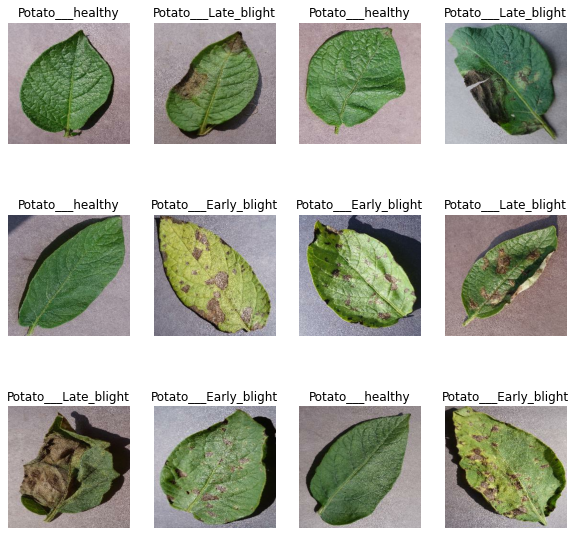

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classNames[label_batch[i]])
    plt.axis("off")

In [7]:
def get_dataset_partitions_tf(dataset, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
  data_size = len(dataset)
  if shuffle:
    dataset = dataset.shuffle(shuffle_size, seed = 12)

  train_size = int(train_split * data_size)
  val_size = int(val_split * data_size)
  train_dataset = dataset.take(train_size)
  val_dataset = dataset.skip(train_size).take(val_size)
  test_dataset = dataset.skip(train_size).skip(val_size)

  return train_dataset,val_dataset,test_dataset

In [8]:
train_dataset, val_dataset, test_dataset = get_dataset_partitions_tf(dataset)

In [9]:
len(train_dataset)

54

In [10]:
len(val_dataset)

6

In [11]:
len(test_dataset)

8

In [12]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
# preprocessing

# scale the numpy array or tensor

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [15]:
# build model using convolutional neural network
n_classes = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =  (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [17]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [18]:
history = model.fit(
    train_dataset,
    epochs = EPOCHS,
    batch_size= BATCH_SIZE,
    verbose = 1,
    validation_data = val_dataset
)

Epoch 1/50
54/54 [==============================] - 230s 4s/step - loss: 0.6477 - accuracy: 0.7297 - val_loss: 0.4623 - val_accuracy: 0.8281
Epoch 2/50
54/54 [==============================] - 209s 4s/step - loss: 0.3041 - accuracy: 0.8808 - val_loss: 0.1725 - val_accuracy: 0.9427
Epoch 3/50
54/54 [==============================] - 237s 4s/step - loss: 0.2186 - accuracy: 0.9132 - val_loss: 0.1705 - val_accuracy: 0.9271
Epoch 4/50
54/54 [==============================] - 205s 4s/step - loss: 0.1385 - accuracy: 0.9485 - val_loss: 0.2082 - val_accuracy: 0.9271
Epoch 5/50
54/54 [==============================] - 206s 4s/step - loss: 0.1263 - accuracy: 0.9537 - val_loss: 0.6583 - val_accuracy: 0.8125
Epoch 6/50
54/54 [==============================] - 206s 4s/step - loss: 0.1843 - accuracy: 0.9259 - val_loss: 0.2569 - val_accuracy: 0.8958
Epoch 7/50
54/54 [==============================] - 206s 4s/step - loss: 0.1809 - accuracy: 0.9387 - val_loss: 0.2256 - val_accuracy: 0.8958
Epoch 8/50
54

54/54 [==============================] - 118s 2s/step - loss: 0.0933 - accuracy: 0.9664 - val_loss: 0.2010 - val_accuracy: 0.9167
Epoch 42/50
54/54 [==============================] - 116s 2s/step - loss: 0.0554 - accuracy: 0.9763 - val_loss: 0.0558 - val_accuracy: 0.9740
Epoch 43/50
54/54 [==============================] - 116s 2s/step - loss: 0.0272 - accuracy: 0.9896 - val_loss: 0.2227 - val_accuracy: 0.9375
Epoch 44/50
54/54 [==============================] - 119s 2s/step - loss: 0.0407 - accuracy: 0.9890 - val_loss: 0.3984 - val_accuracy: 0.8854
Epoch 45/50
54/54 [==============================] - 118s 2s/step - loss: 0.0211 - accuracy: 0.9959 - val_loss: 0.0705 - val_accuracy: 0.9740
Epoch 46/50
54/54 [==============================] - 117s 2s/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.1181 - val_accuracy: 0.9688
Epoch 47/50
54/54 [==============================] - 116s 2s/step - loss: 0.0241 - accuracy: 0.9913 - val_loss: 0.4147 - val_accuracy: 0.9062
Epoch 48/50
54/54 

In [19]:
scores = model.evaluate(test_dataset)

8/8 [==============================] - 6s 559ms/step - loss: 0.1658 - accuracy: 0.9648


In [20]:
scores

[0.1658390313386917, 0.96484375]

In [21]:
history

In [22]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [24]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

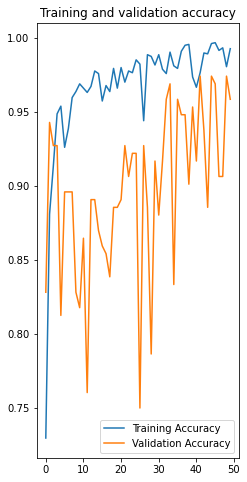

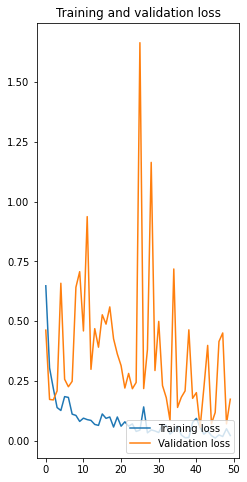

In [72]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and validation loss')


first image to predict
first image's actual label: Potato___Late_blight
1/1 [==============================] - 1s 587ms/step
Predicted label Potato___Late_blight


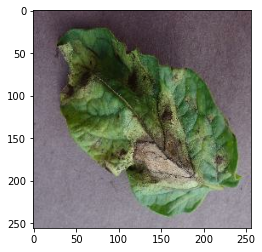

In [46]:
for image_batch, label_batch in dataset.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",classNames[first_label])
    
    
    batch_prediction = model.predict(image_batch)
    print('Predicted label',classNames[np.argmax(batch_prediction[0])])  #returns index of max num
    
    

In [62]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = classNames[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 37ms/step


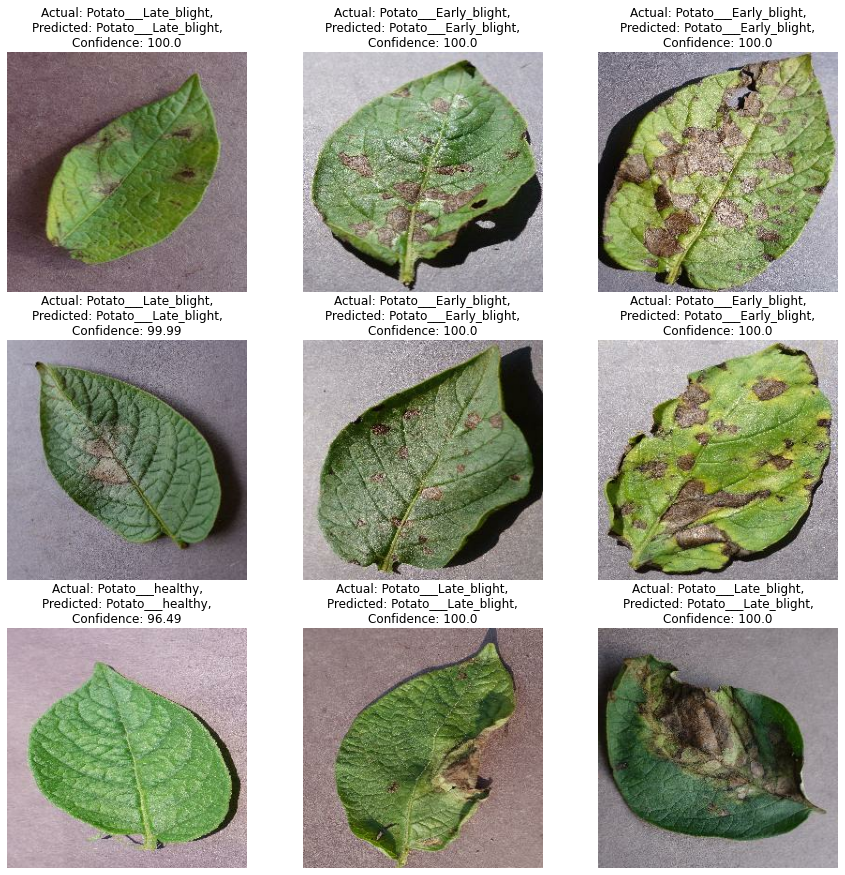

In [73]:
plt.figure(figsize=(15,15))
for images, label in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classNames[label[i]]
        
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}")
        
        plt.axis("off")

In [69]:
import os
nextModelversion = max([int(i) for i in os.listdir("Models") + [0]]) + 1
nextModelversion

2

In [67]:
model_version = 1 
model.save(f"Models/{model_version}")

INFO:tensorflow:Assets written to: Models/1\assets


INFO:tensorflow:Assets written to: Models/1\assets
